# Yeo-Johnson transformation

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)


In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# with open-source packages
from sklearn.preprocessing import PowerTransformer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467

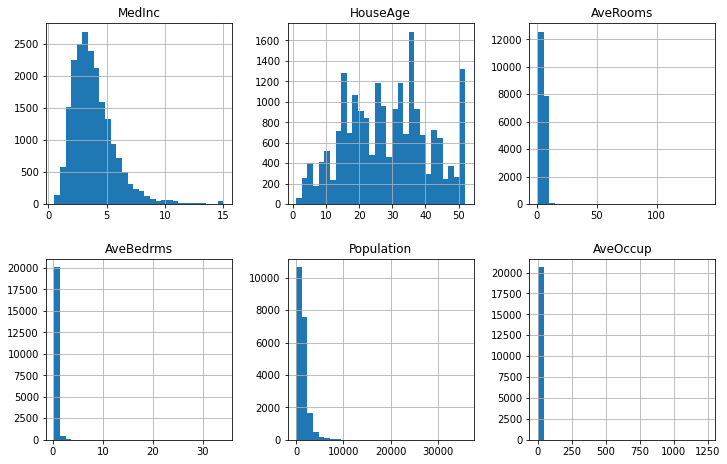

In [3]:
# Plot histograms to inspect variable distributions

X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [4]:
# capture variable names in a list

variables = list(X.columns)

variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [5]:
# Make Q-Q plots for all variables


def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

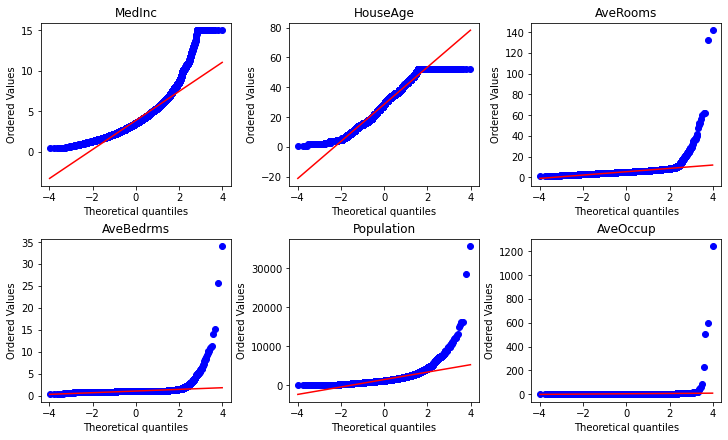

In [6]:
make_qqplot(X)

# Yeo-Johnson transformation with Scikit-learn

In [7]:
# initialize a transformer with yeo-johnson

transformer = PowerTransformer(method="yeo-johnson", standardize=False)

transformer.set_output(transform="pandas")

PowerTransformer(standardize=False)

In [8]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

PowerTransformer(standardize=False)

In [9]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

array([-0.19850989,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134563])

In [10]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

MedInc   HouseAge  AveRooms  AveBedrms  Population  AveOccup
0      1.803599  24.133444  1.234372   0.217303   12.223224  0.755821
1      1.801958  13.807367  1.202460   0.216060   22.087944  0.710445
2      1.724579  29.380778  1.280312   0.218341   13.970688  0.776570
3      1.578385  29.380778  1.182107   0.218334   14.478725  0.755137
4      1.354895  29.380778  1.204470   0.218489   14.533326  0.718551
...         ...        ...       ...        ...         ...       ...
20635  0.857611  15.981965  1.139177   0.219428   16.384868  0.756273
20636  1.121673  12.126445  1.196652   0.221895   12.613530  0.799990
20637  0.901462  11.555094  1.148759   0.219202   17.247984  0.733858
20638  0.950502  12.126445  1.155919   0.220045   15.761405  0.711984
20639  1.083834  10.977618  1.151626   0.219896   18.917959  0.761239

[20640 rows x 6 columns]

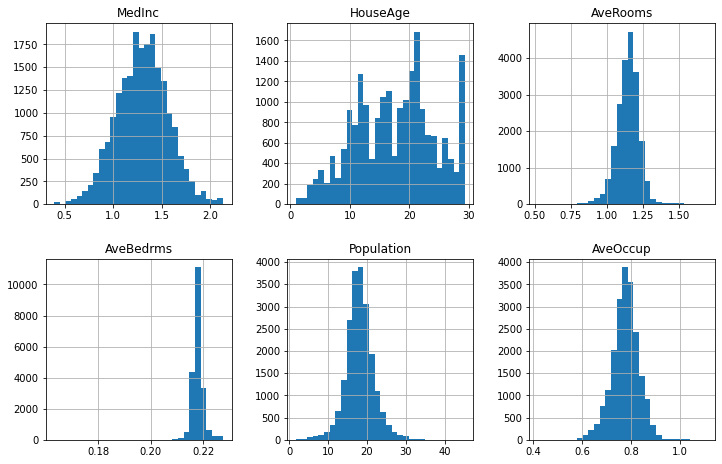

In [11]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

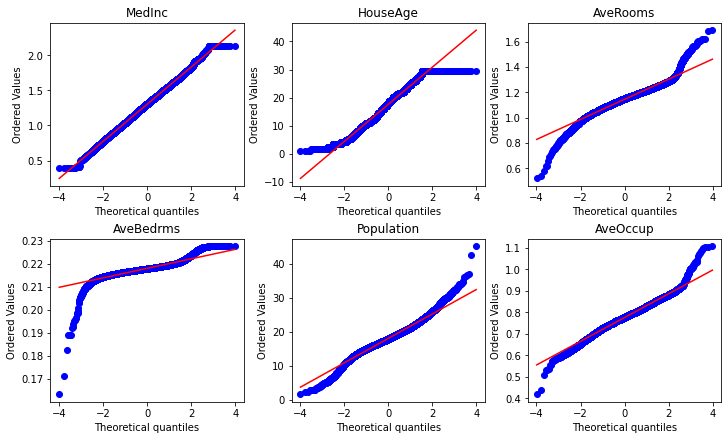

In [12]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)